In [91]:
import numpy as np
import cv2
import math
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [103]:
def draw_img(input_shape=(100, 100), x=50, y=50, radius=10, value=1):
    img = np.zeros(input_shape, dtype=np.float32)
    cv2.circle(img, (x,y), radius, value, -1)
    return img

In [100]:
def binary_crossentropy(y_true, y_pred):
    eps = 1e-12
    return (-np.sum(y_true*np.log(y_pred+eps)))/(y_true.size)

In [101]:
def dice(y_true, y_pred):
    eps = 1e-12
    intersection = np.sum(y_true*y_pred)
    return -((2*intersection+eps)/(np.sum(y_true*y_true) + np.sum(y_pred*y_pred) + eps)) + 0.8759033693749348

In [102]:
def iou(y_true, y_pred):
    eps = 1e-12
    intersection = np.sum(y_true*y_pred)
    return -((intersection+eps)/(np.sum(y_true) + np.sum(y_pred) - intersection + eps)) + 0.8759033693749348

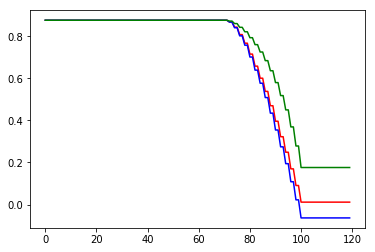

In [104]:
y_true = draw_img()
bc = []
de = []
iu = []
for i in xrange(120):
    x = min(int(i*0.5), 50)
    y = min(int(i*0.5), 50)
    if i<10:
        r = int(i*0.1)
    elif i<50:
        r = 5
    else:
        r=10
    y_pred = draw_img(x=x, y=y, radius=r, value=0.7)
    bc.append(binary_crossentropy(y_true, y_pred))
    de.append(dice(y_true, y_pred))
    iu.append(iou(y_true, y_pred))

    
# plt.figure(figsize=(10,10))
plt.plot(bc, 'r') 
plt.plot(de, 'b') 
plt.plot(iu, 'g') 
plt.show()